In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import string

In [2]:
filename ='Dataset.csv'

In [3]:
with open(filename, "r",errors='ignore') as file:
    reader = csv.DictReader(file,delimiter='|')
    rows = list(reader)

In [4]:
df = pd.DataFrame(rows)

In [5]:
df.head()

,label,text
0,5,It's Tim Ferriss. Extracting value that you a...
1,3,"Good reviews, but not what I expected. Overall..."
2,5,Tim Ferriss a rapidly evolving meta human/mut...
3,5,Anything Tim Ferriss I will buy. Podcasts are ...
4,3,Love the authors podcasts and the book is ever...


In [6]:
df.groupby('label').count()

,text
label,
1,1791
2,1797
3,3807
4,8872
5,47255


In [7]:
df.shape

(63522, 2)

In [15]:
df.drop(df[df.label=='3'].index, inplace=True)


In [16]:
df.loc[(df.label=='5')|(df.label=='4'),'label']=0

In [17]:
df.loc[(df.label=='1')|(df.label=='2'),'label']=1

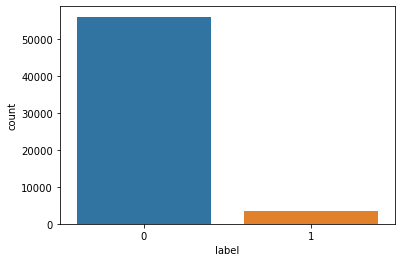

In [18]:
sns.countplot(df['label'], label = 'Count')

In [19]:
df['lenght'] = df['text'].apply(len)
df

,label,text,lenght
0,0,It's Tim Ferriss. Extracting value that you a...,122
2,0,Tim Ferriss a rapidly evolving meta human/mut...,398
3,0,Anything Tim Ferriss I will buy. Podcasts are ...,177
5,0,Awesome and practical!,22
6,0,What an incredible book!,24
...,...,...,...
63516,0,It was a great way to end the trilogy! Awesome...,52
63517,0,I enjoyed reading this book but felt the first...,134
63519,0,Way better than the movie!,26
63520,0,Great paperback set. Comes with a cardboard co...,90


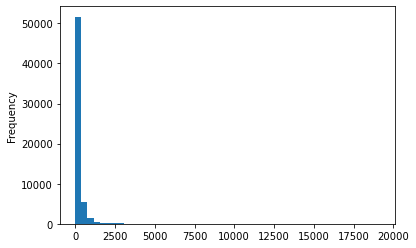

In [20]:
df['lenght'].plot(bins=50, kind='hist') 

In [21]:
df.describe()

,lenght
count,59715.000000
mean,217.020129
std,404.305604
min,1.000000
25%,44.000000
50%,116.000000
75%,234.000000
max,19142.000000


In [22]:
positive = df[df.label==0]
negative=df[df.label==1]

In [24]:
positive.lenght.describe()

count    56127.000000
mean       211.894169
std        394.330802
min          1.000000
25%         43.000000
50%        115.000000
75%        229.000000
max      19142.000000
Name: lenght, dtype: float64

In [25]:
negative.lenght.describe()

count     3588.000000
mean       297.205407
std        530.390616
min          2.000000
25%         66.000000
50%        149.000000
75%        326.000000
max      11864.000000
Name: lenght, dtype: float64

In [27]:
# проверить значима ли разница между средней длиной текста позитивных отзывов и негативных
from scipy import stats
stats.ttest_ind(positive.lenght, negative.lenght, equal_var=False)

Ttest_indResult(statistic=-9.468825083098423, pvalue=4.789870739073252e-21)

In [16]:
pos_sent = positive['text'].tolist()
pos_as_one = " ".join(pos_sent)

In [17]:
neg_sent = negative['text'].tolist()
neg_as_one = " ".join(neg_sent)

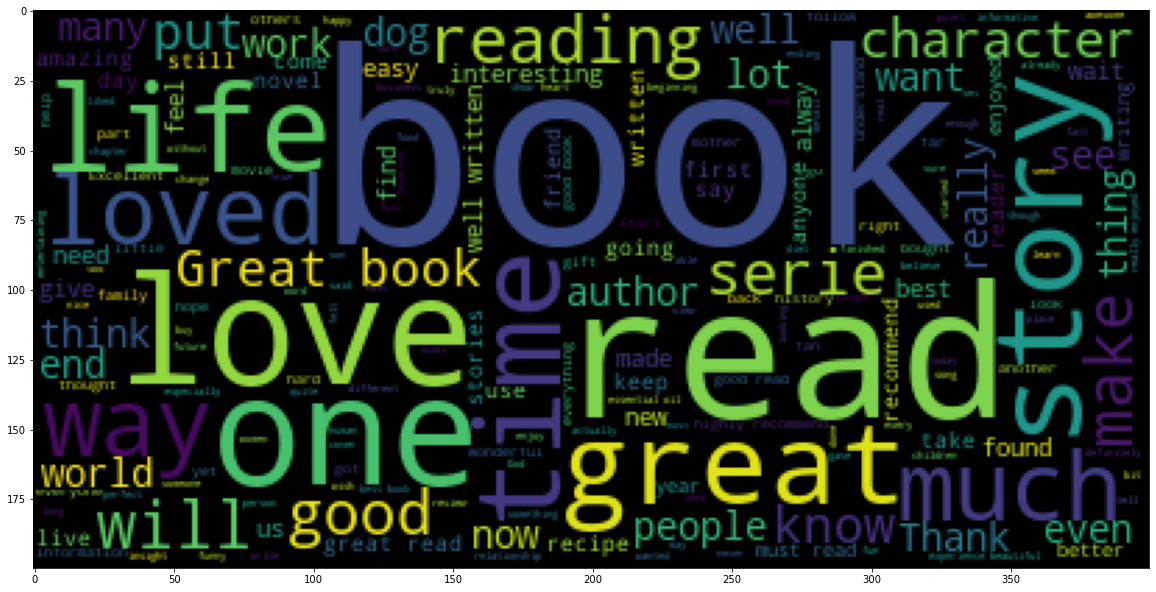

In [18]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(pos_as_one))

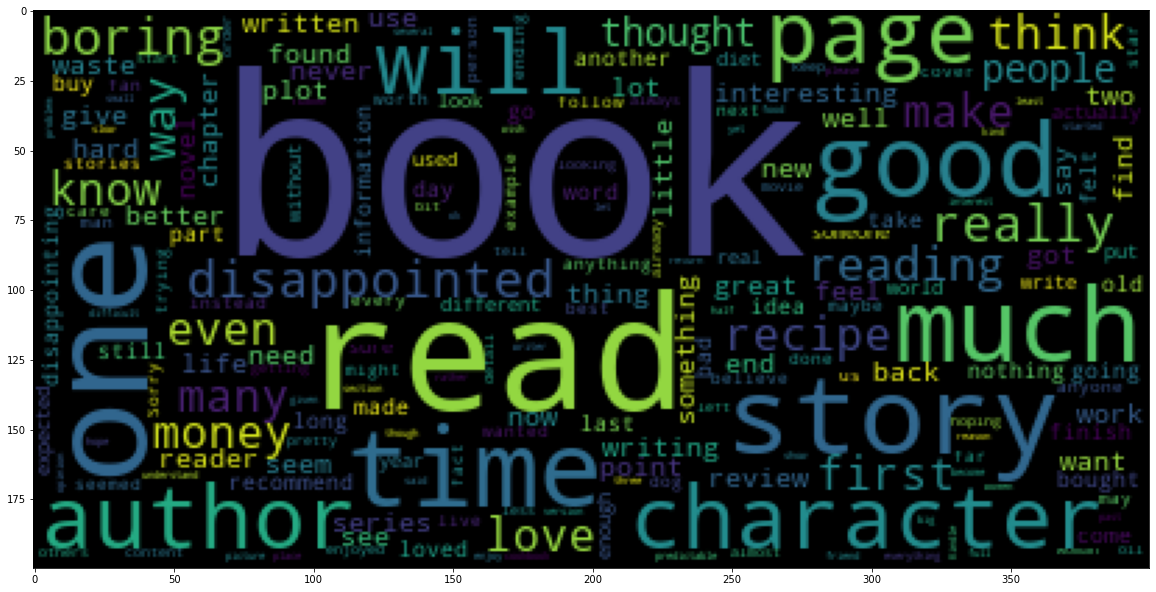

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_as_one))

In [20]:
df

,label,text,lenght
0,0,It's Tim Ferriss. Extracting value that you a...,122
2,0,Tim Ferriss a rapidly evolving meta human/mut...,398
3,0,Anything Tim Ferriss I will buy. Podcasts are ...,177
5,0,Awesome and practical!,22
6,0,What an incredible book!,24
...,...,...,...
63516,0,It was a great way to end the trilogy! Awesome...,52
63517,0,I enjoyed reading this book but felt the first...,134
63519,0,Way better than the movie!,26
63520,0,Great paperback set. Comes with a cardboard co...,90


In [21]:
df.label.unique()

array([0, 1], dtype=object)